In [2]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import os
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [5]:
LI = pd.read_csv('./nwt_performance_Fienen_Long_Island.csv')
LI.head()

,NWT Number,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss
0,0,1.000000e+12,999999.00,21000.0,-1.0,9999.000000
1,1,1.000000e+12,999999.00,21000.0,-1.0,9999.000000
2,2,5.845169e+03,-0.24,5518.0,2.0,5845.168811
3,3,1.000000e+12,999999.00,21000.0,-1.0,5845.168811
4,4,1.000000e+12,999999.00,21000.0,-1.0,5845.168811


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_yscale'

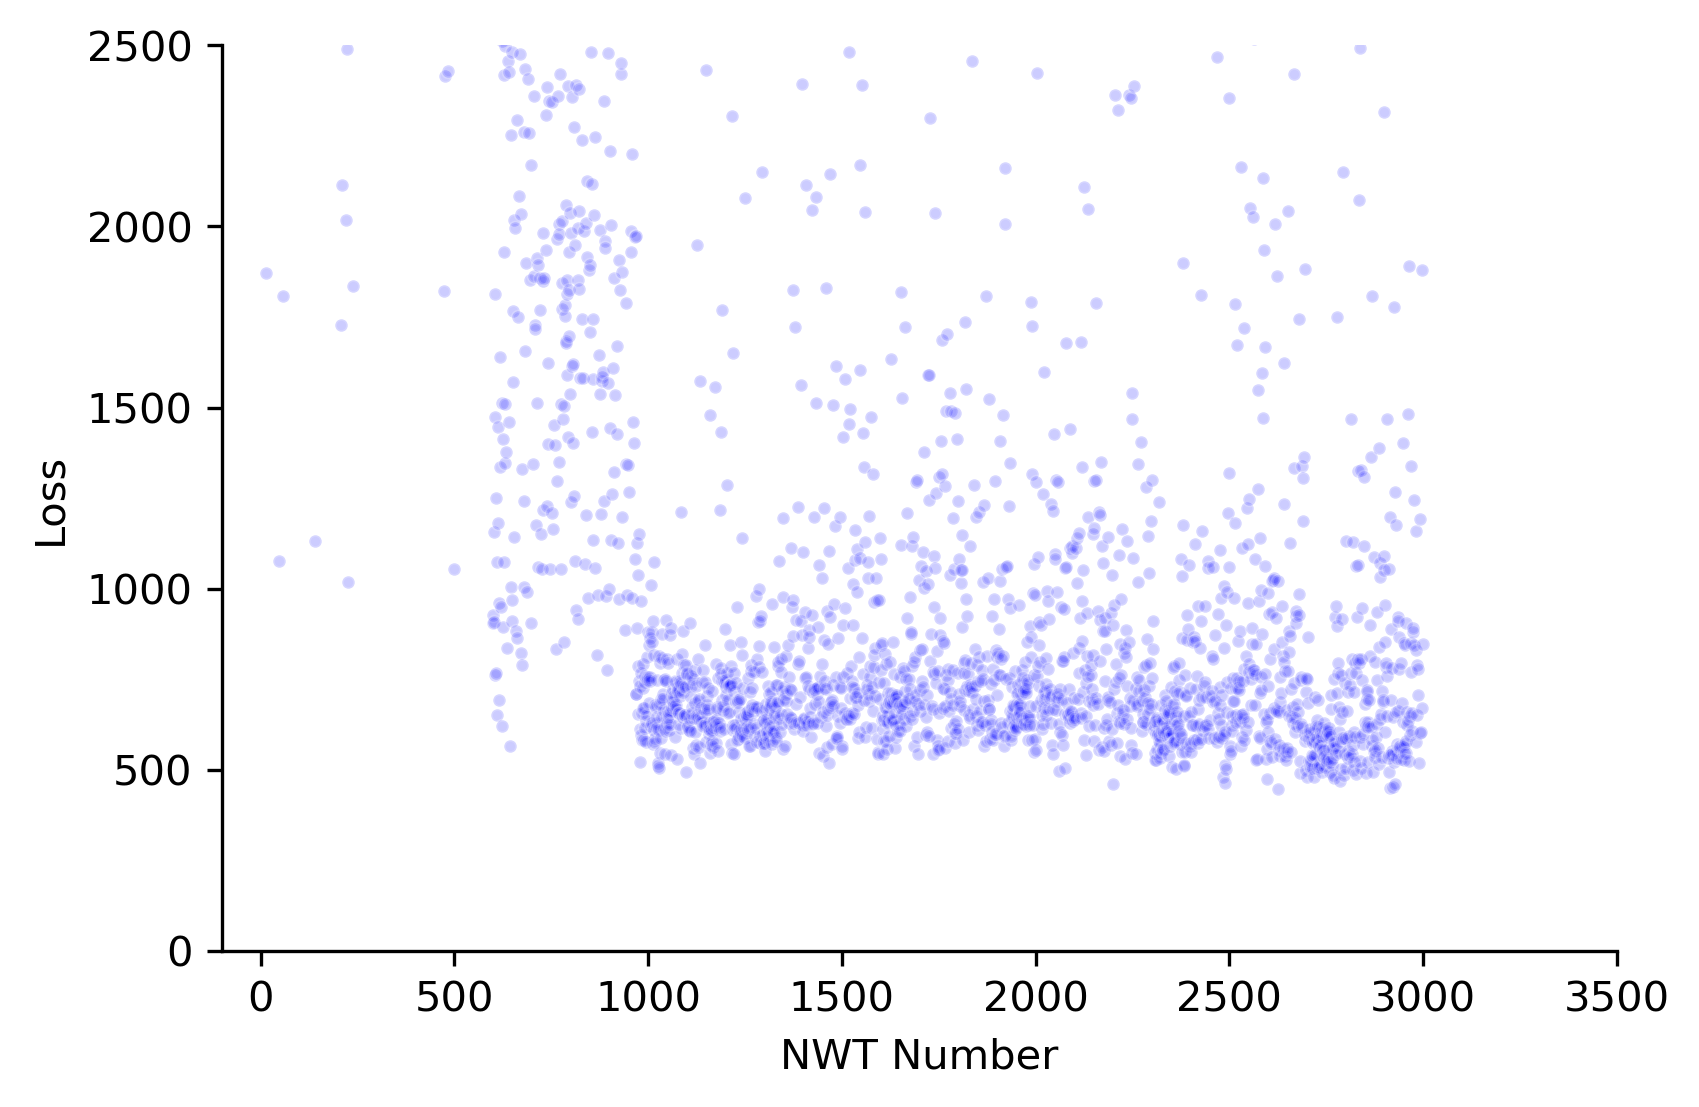

In [11]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = LI[LI['Seconds Elapased'] < 21000], x = 'NWT Number', y = 'Loss', color = 'b', alpha = .2, marker = '.')
# plt.vlines(x = error_lines, ymin =120, ymax = 500, alpha = .01)
plt.ylim(0, 2500)
plt.xlim(-100, 3500)
plt.xlabel('Trial')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - Partridge Steady-State')
# plt.savefig('./auxilary/paper_figs/partridge_loss_compare.png')
plt.show()

In [ ]:
tpe_clean = partridge_tpe[(partridge_tpe['Seconds Elapased'] < 750)].dropna()
random_clean = partridge_random[(partridge_random['Seconds Elapased'] < 750)].dropna()

In [ ]:
combined = pd.DataFrame()
combined['NWTOPT'] = tpe_clean['Loss']
combined['Random Search'] = random_clean['Loss']
combined.head()

In [ ]:
def set_style():
    plt.style.use(['seaborn-paper'])
set_style()

In [ ]:
plt.figure(figsize = (6, 4), dpi = 300)
sns.kdeplot(data = combined['NWTOPT'], color = 'b', label = 'TPE')
sns.kdeplot(data = combined['Random Search'], color = 'r')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.title('NWTOPT vs. Random Loss KDE Distributions - Partridge River Steady-State')
# plt.savefig('./partridge_dist.png')
plt.show()

In [ ]:
meras_tpe = pd.read_csv('./new-loss-meras-transient-tpe_nwts/nwt_performance.csv')
meras_tpe.head()

In [ ]:
meras_random = pd.read_csv('./6-10-meras-transient-random_nwts/nwt_performance.csv')
meras_random.head()

In [ ]:
tpe_clean = meras_tpe[(meras_tpe['Loss'] < 9000)].dropna()
random_clean = meras_random[(meras_random['Loss'] < 9000)].dropna()
combined = pd.DataFrame()
combined['NWTOPT'] = tpe_clean['Loss']
combined['Random Search'] = random_clean['Loss']
combined.head()

In [ ]:
plt.figure(figsize = (6, 4), dpi = 300)
sns.kdeplot(data = combined['NWTOPT'], color = 'b', label = 'TPE')
sns.kdeplot(data = combined['Random Search'], color = 'r')
plt.xlabel('Loss')
plt.ylabel('Density')
# plt.title('NWTOPT vs. Random Loss KDE Distributions - MAP Transient')
plt.savefig('./auxilary/paper_figs/meras_dist.png')
plt.show()

In [ ]:
error_lines = meras_tpe[(meras_tpe['Mass Balance'] == 999999)]['NWT Number'].to_list()

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = meras_tpe[(meras_tpe['Loss'] < 6950) & (meras_tpe['NWT Number'] < 3450)], x = 'NWT Number', y = 'Loss', color = 'b', alpha = .2)
sns.scatterplot(ax = ax, data = meras_random[meras_random['Loss'] < 6950], x = 'NWT Number', y = 'Loss', color = 'r', alpha = .2)
# plt.vlines(x = error_lines, ymin = 2000, ymax = 7000, alpha = .01)
plt.ylim(2000, 7000)
plt.xlim(-100, 3500)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Trial')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - MAP Transient')
# plt.savefig('./auxilary/paper_figs/meras_loss_compare.png')
plt.show()

In [ ]:

f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = partridge_tpe[partridge_tpe['Seconds Elapased'] < 750], x = 'NWT Number', y = 'Loss', color = 'b', alpha = .2)
sns.scatterplot(ax = ax, data = partridge_random[partridge_random['Loss'] < 490], x = 'NWT Number', y = 'Loss', color = 'r', alpha = .2)
# plt.vlines(x = error_lines, ymin =120, ymax = 500, alpha = .01)
plt.ylim(120, 750)
plt.xlim(-100, 3500)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Trial')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - Partridge Steady-State')
# plt.savefig('./auxilary/paper_figs/partridge_loss_compare.png')
plt.show()

In [4]:
from tqdm import tqdm
partridge_tpe['Start Time'] = pd.to_datetime(partridge_tpe['Start Time'])
partridge_tpe['Finish Time'] = pd.to_datetime(partridge_tpe['Finish Time'])
num_before_col = []
for i in tqdm(range(3500)):
    num_before = 0
    curr_row_start = partridge_tpe.at[i, 'Start Time']
    for j in range(i):
        if partridge_tpe.at[j,'Finish Time'] < curr_row_start:
            num_before += 1
    num_before_col += [num_before]
partridge_tpe['num_before'] = num_before_col

partridge_random['Start Time'] = pd.to_datetime(partridge_random['Start Time'])
partridge_random['Finish Time'] = pd.to_datetime(partridge_random['Finish Time'])
num_before_col = []
for i in tqdm(range(3500)):
    num_before = 0
    curr_row_start = partridge_random.at[i, 'Start Time']
    for j in range(i):
        if partridge_random.at[j,'Finish Time'] < curr_row_start:
            num_before += 1
    num_before_col += [num_before]
partridge_random['num_before'] = num_before_col

100%|██████████| 3500/3500 [00:43<00:00, 81.34it/s] 


In [6]:
partridge_tpe

,NWT Number,Start Time,Finish Time,Loss,Mass Balance,Seconds Elapased,# of Iterations,Min Loss,num_before
0,0,2021-09-26 16:56:27,2021-09-26 17:02:05,1.000000e+12,999999.00,999999.000,-1.0,9999.000000,0
1,1,2021-09-26 16:56:28,2021-09-26 17:08:58,1.000000e+12,999999.00,750.000,-1.0,9999.000000,0
2,2,2021-09-26 16:56:32,2021-09-26 17:09:02,1.000000e+12,999999.00,750.000,-1.0,9999.000000,0
3,3,2021-09-26 16:56:36,2021-09-26 17:09:06,1.000000e+12,999999.00,750.000,-1.0,9999.000000,0
4,4,2021-09-26 16:56:36,2021-09-26 17:09:06,1.000000e+12,999999.00,750.000,-1.0,9999.000000,0
...,...,...,...,...,...,...,...,...,...
3495,3495,2021-09-26 18:05:02,2021-09-26 18:09:34,2.695506e+02,-0.06,268.582,33.0,163.520351,3205
3496,3496,2021-09-26 18:05:03,2021-09-26 18:08:46,2.343362e+02,-0.23,222.262,32.0,163.520351,3206
3497,3497,2021-09-26 18:05:06,2021-09-26 18:09:59,2.890521e+02,-0.04,288.590,42.0,163.520351,3209
3498,3498,2021-09-26 18:05:07,2021-09-26 18:09:45,2.827968e+02,-0.18,273.781,35.0,163.520351,3209


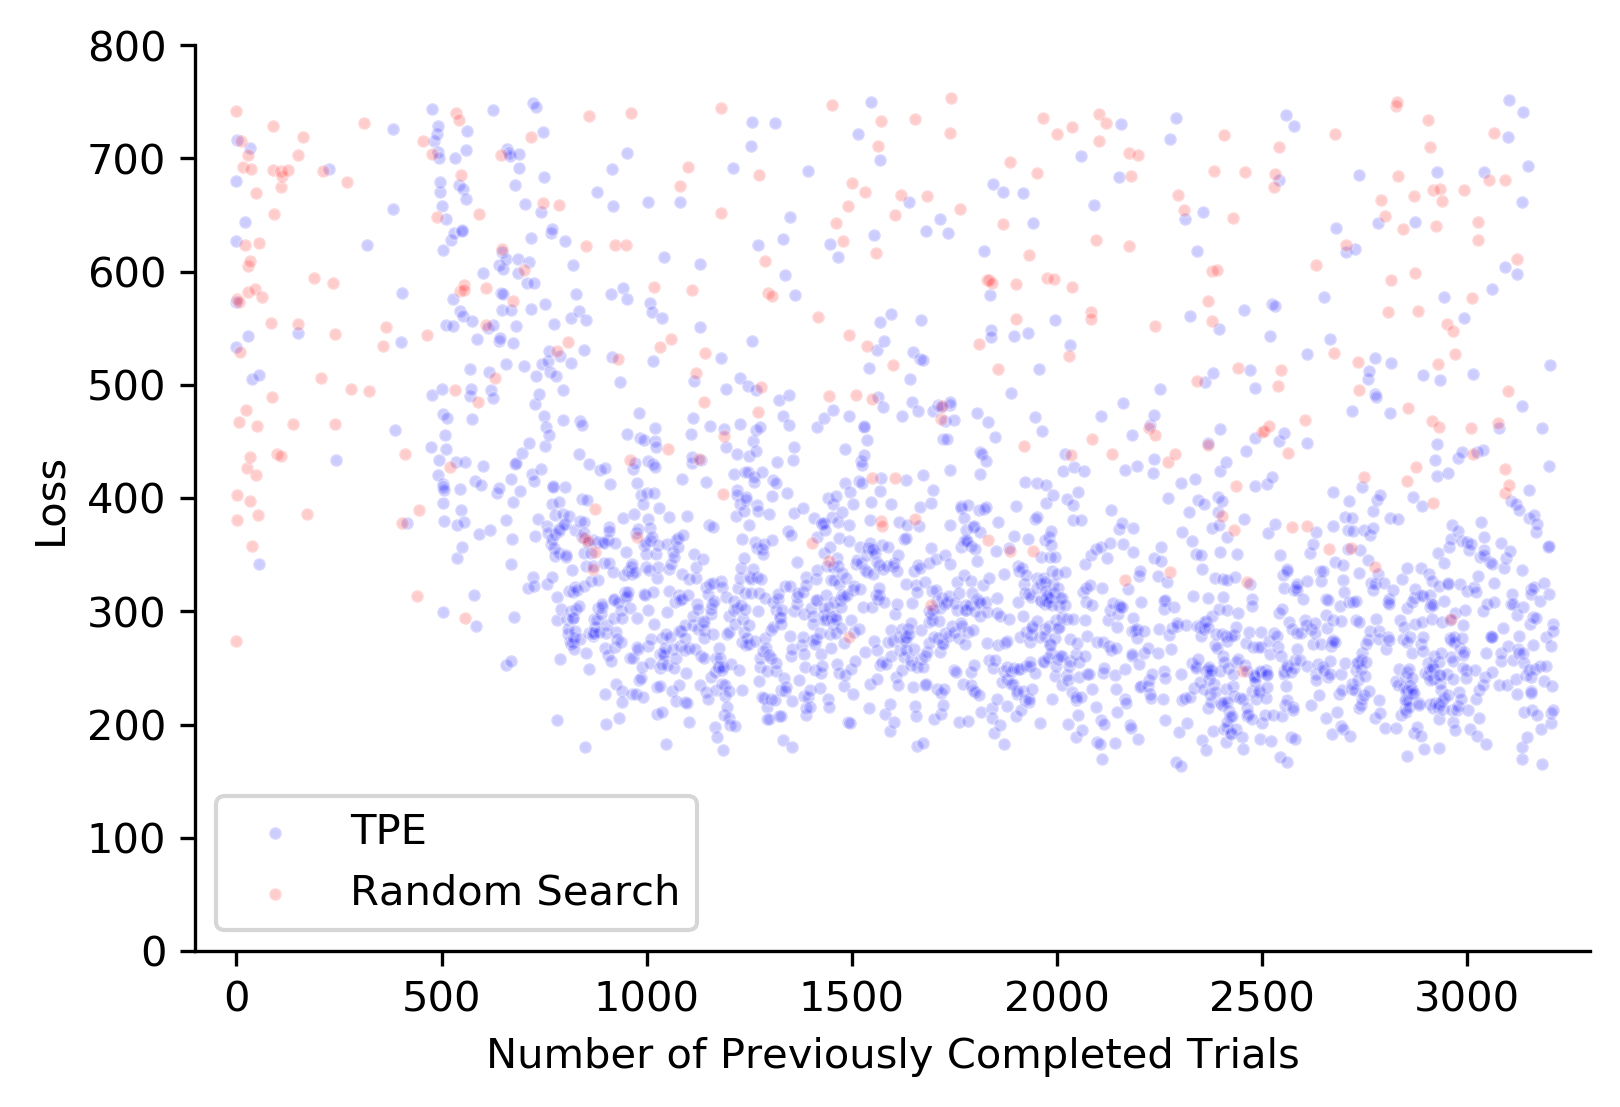

In [27]:
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.scatterplot(ax = ax, data = partridge_tpe[partridge_tpe['Seconds Elapased'] < 750], x = 'num_before', y = 'Loss', color = 'b', alpha = .2, marker = '.')
sns.scatterplot(ax = ax, data = partridge_random[partridge_random['Seconds Elapased'] < 750], x = 'num_before', y = 'Loss', color = 'r', alpha = .2, marker = '.')
# plt.vlines(x = error_lines, ymin =120, ymax = 500, alpha = .01)
plt.ylim(0, 800)
plt.xlim(-100, 3300)
ax.legend(labels=["TPE","Random Search"])
plt.xlabel('Number of Previously Completed Trials')
plt.ylabel('Loss')
# plt.title('NWTOPT vs. Random Search by epoch - Partridge Steady-State')
# plt.savefig('./auxilary/paper_figs/partridge_loss_compare.png')
plt.show()

In [ ]:
err_p_tpe = partridge_tpe[(partridge_tpe['Mass Balance'] == 999999)]['NWT Number'].to_list()
err_p_ran = partridge_random[(partridge_random['Mass Balance'] == 999999)]['NWT Number'].to_list()
err_m_tpe = meras_tpe[(meras_tpe['Mass Balance'] == 999999)]['NWT Number'].to_list()
err_m_ran = meras_random[(meras_random['Mass Balance'] == 999999)]['NWT Number'].to_list()
f, ax = plt.subplots(1, 1, figsize = (6, 4), dpi = 300)
sns.kdeplot(data = err_p_tpe, color = 'b', bw = 100, linestyle = 'dashed', label = 'TPE - Partridge River')
ran = sns.kdeplot(data = err_p_ran, color = 'r', bw = 100, linestyle = 'dashed', label = 'Random Search - Partridge River')
sns.kdeplot(ax = ax, data = err_m_tpe, color = 'b', bw = 100, label = 'TPE - MAP Transient')
sns.kdeplot(ax = ax, data = err_m_ran, color = 'r', bw = 100, label = 'Random Search - MAP Transient')
ran.axhline(.00029, color = 'k', label = 'Average Random Search Performance', alpha = .4)
plt.xlim(250, 3250)
plt.ylim(0, .0008)
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Density of Error Runs')
# plt.title('Distribution of Errored Runs')
plt.savefig('./auxilary/paper_figs/dist_Errors.png')
plt.show()
